<a href="https://www.kaggle.com/code/hodanaz/world-health-eda?scriptVersionId=178797240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/country-health-trends-dataset/gapminder.csv


In [2]:
#import relevant libraries


import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#missing values visualization
import missingno as msno 

import warnings
warnings.filterwarnings('ignore')


In [3]:
#set default seaborn theme
sns.set(rc={"axes.facecolor":"#fbfefb", 
            'grid.color': '#dad7cd',
            "axes.grid":True,
            'xtick.labelsize':14,
            'ytick.labelsize':14})

# 1. Introduction

This dataset contains key demographic, health, and socio-economic indicators that are crucial for a wide range of analyses.


#### Feature information:
* Country: Lists the names of countries or territories.
* LifeExpectancy: Numerical column indicating the average number of years a newborn is expected to live if current mortality.
* FertilityRate: Average number of children a woman would have over her lifetime, given current birth rates.
* Population: The total number of people living in the country.
* Region: Classifies countries into geographical and political regions.




## Objective:
* to gather observations on relationship between variables

In [4]:
#read data
health = pd.read_csv('/kaggle/input/country-health-trends-dataset/gapminder.csv')
health

,Country,LifeExpectancy,FertilityRate,Population,Region
0,Afghanistan,51.000,7.81,19701940,South Asia
1,Albania,74.200,2.47,3121965,Europe & Central Asia
2,Algeria,73.200,2.63,31183658,Middle East & North Africa
3,Angola,52.600,6.88,15058638,Sub-Saharan Africa
4,Antigua and Barbuda,73.900,2.32,77648,America
...,...,...,...,...,...
186,Virgin Islands (U.S.),79.247,2.13,108511,America
187,West Bank and Gaza,73.500,5.57,3223781,Middle East & North Africa
188,Western Sahara,66.507,3.04,305615,Middle East & North Africa
189,Zambia,45.700,6.10,10585220,Sub-Saharan Africa


In [5]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   FertilityRate   191 non-null    float64
 3   Population      191 non-null    object 
 4   Region          191 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.6+ KB


In [6]:
health.shape
print('The dataset contains', health.shape[0], 
      'rows and', health.shape[1], 'columns')


The dataset contains 191 rows and 5 columns


In [7]:
#categorical variables
health.select_dtypes(exclude=[np.number]).columns

Index(['Country', 'Population', 'Region'], dtype='object')

Why is population a categorical variable and of type object?


In [8]:
health.describe().T

,count,mean,std,min,25%,50%,75%,max
LifeExpectancy,191.0,68.427293,9.369538,45.70,61.40,71.3,75.85,82.663
FertilityRate,191.0,3.297906,1.763855,0.88,1.79,2.8,4.50,7.810


# 2. Data Cleaning

<Axes: >

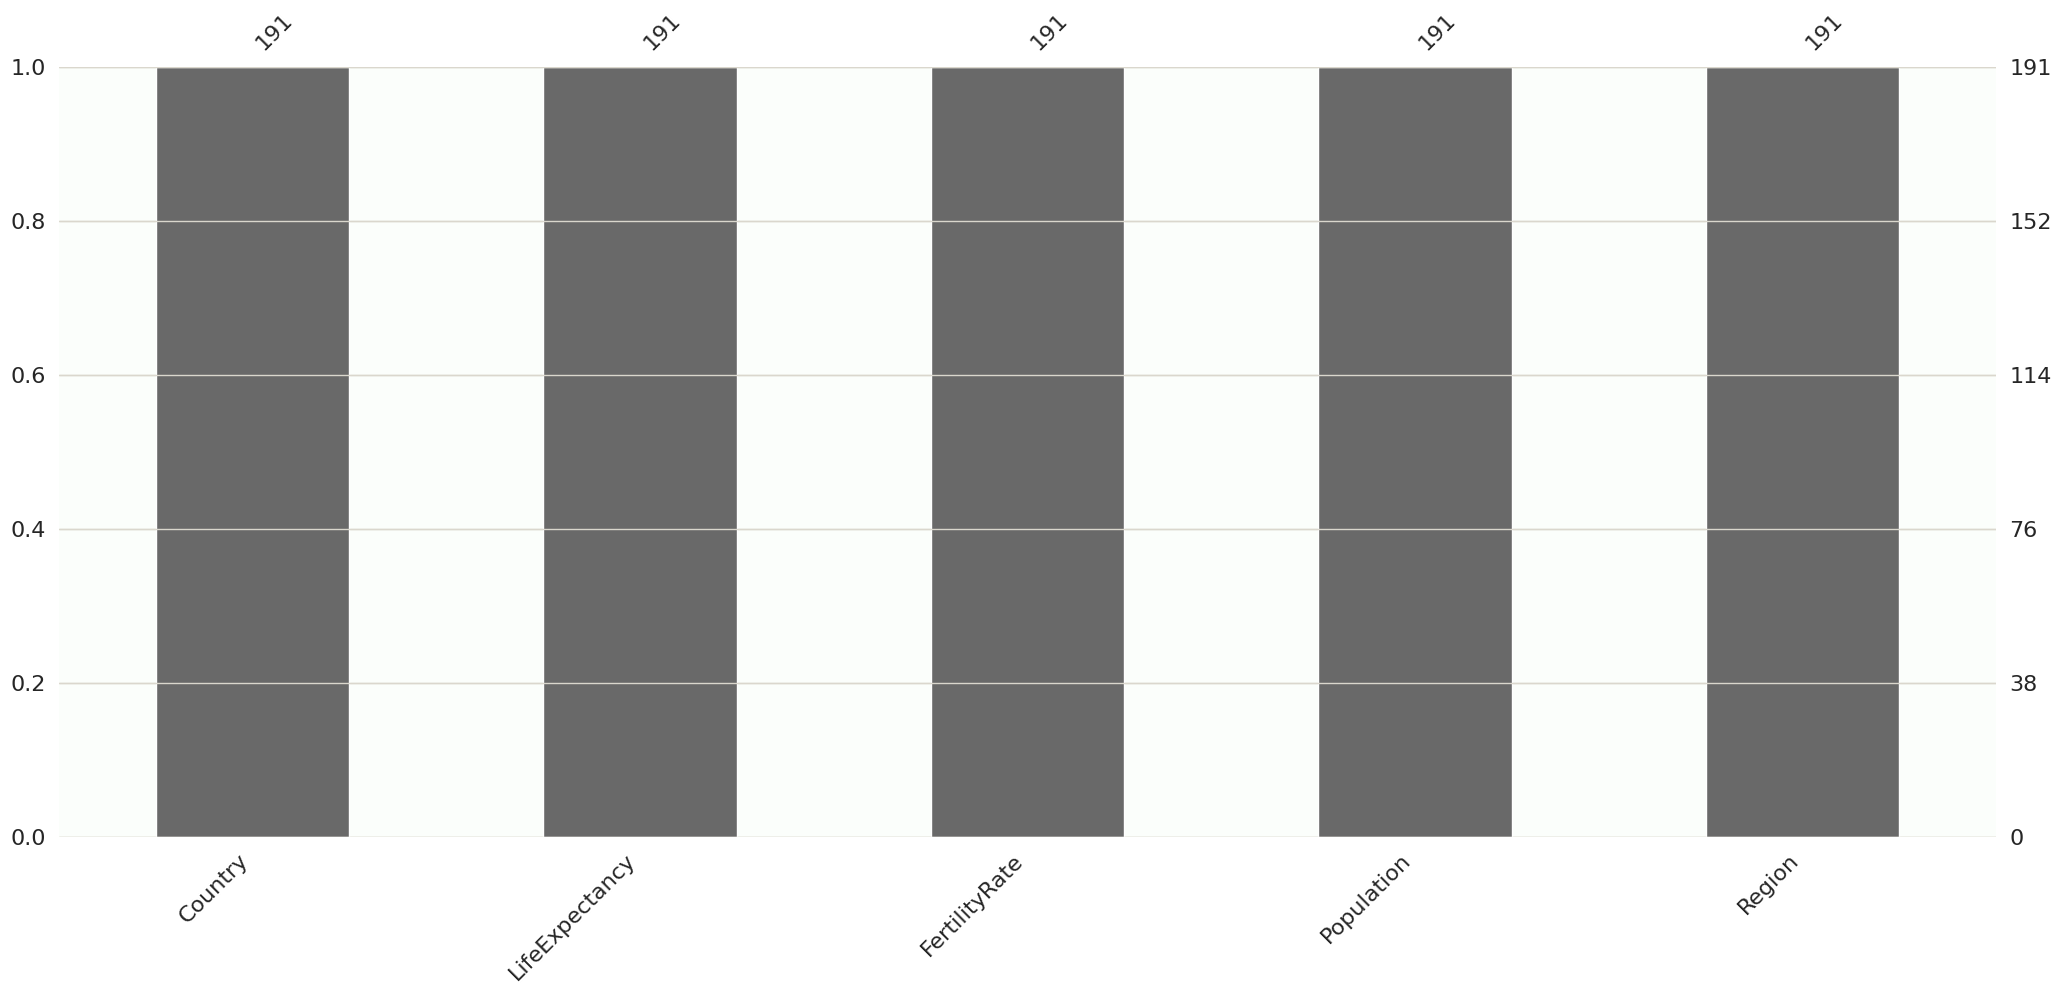

In [9]:
msno.bar(health)

No null values. Good for us.

let's deal with the population column.

In [10]:
health['Population'].unique() #random commas, alright

array(['19701940', '3121965', '31183658', '15058638', '77648', '37057453',
       '3076098', '90858', '19,107,251', '8,050,884', '8117742', '297891',
       '666855', '131280739', '269838', '9952055', '10,268,380', '247312',
       '6949366', '564187', '8339512', '3792878', '1736579', '175786441',
       '330554', '8000510', '11607944', '6767073', '12197905', '15927713',
       '30701903', '438737', '8343321', '148725', '15,170,387',
       '1,269,974,572', '40403959', '547696', '48048664', '3109269',
       '3925450', '16517948', '4428069', '11116787', '943287',
       '5,338,283', '722562', '12628596', '68334905', '5811836', '530896',
       '3535156', '1399145', '66443603', '811223', '5,176,482',
       '59,387,183', '163162', '237267', '1231548', '1228863', '4743591',
       '81,895,925', '18824994', '10,954,032', '56174', '101620',
       '431157', '155328', '11688660', '8799165', '1315455', '742218',
       '8549202', '6243080', '6783502', '10224113', '281214',
       '1053481072

In [11]:
health['Population'] = health['Population'].astype(str) #convert to type string

In [12]:
#replace commas with nothing
health['Population'] = health['Population'].str.replace(",",'') 

In [13]:
#looking good
health['Population'].unique()

array(['19701940', '3121965', '31183658', '15058638', '77648', '37057453',
       '3076098', '90858', '19107251', '8050884', '8117742', '297891',
       '666855', '131280739', '269838', '9952055', '10268380', '247312',
       '6949366', '564187', '8339512', '3792878', '1736579', '175786441',
       '330554', '8000510', '11607944', '6767073', '12197905', '15927713',
       '30701903', '438737', '8343321', '148725', '15170387',
       '1269974572', '40403959', '547696', '48048664', '3109269',
       '3925450', '16517948', '4428069', '11116787', '943287', '5338283',
       '722562', '12628596', '68334905', '5811836', '530896', '3535156',
       '1399145', '66443603', '811223', '5176482', '59387183', '163162',
       '237267', '1231548', '1228863', '4743591', '81895925', '18824994',
       '10954032', '56174', '101620', '431157', '155328', '11688660',
       '8799165', '1315455', '742218', '8549202', '6243080', '6783502',
       '10224113', '281214', '1053481072', '211540428', '65850062',


In [14]:
#convert population column to numeric
health['Population'] = pd.to_numeric(health['Population'])

In [15]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   FertilityRate   191 non-null    float64
 3   Population      191 non-null    int64  
 4   Region          191 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [16]:
health

,Country,LifeExpectancy,FertilityRate,Population,Region
0,Afghanistan,51.000,7.81,19701940,South Asia
1,Albania,74.200,2.47,3121965,Europe & Central Asia
2,Algeria,73.200,2.63,31183658,Middle East & North Africa
3,Angola,52.600,6.88,15058638,Sub-Saharan Africa
4,Antigua and Barbuda,73.900,2.32,77648,America
...,...,...,...,...,...
186,Virgin Islands (U.S.),79.247,2.13,108511,America
187,West Bank and Gaza,73.500,5.57,3223781,Middle East & North Africa
188,Western Sahara,66.507,3.04,305615,Middle East & North Africa
189,Zambia,45.700,6.10,10585220,Sub-Saharan Africa


# 3. Data Analysis

Quick overall relationship analysis


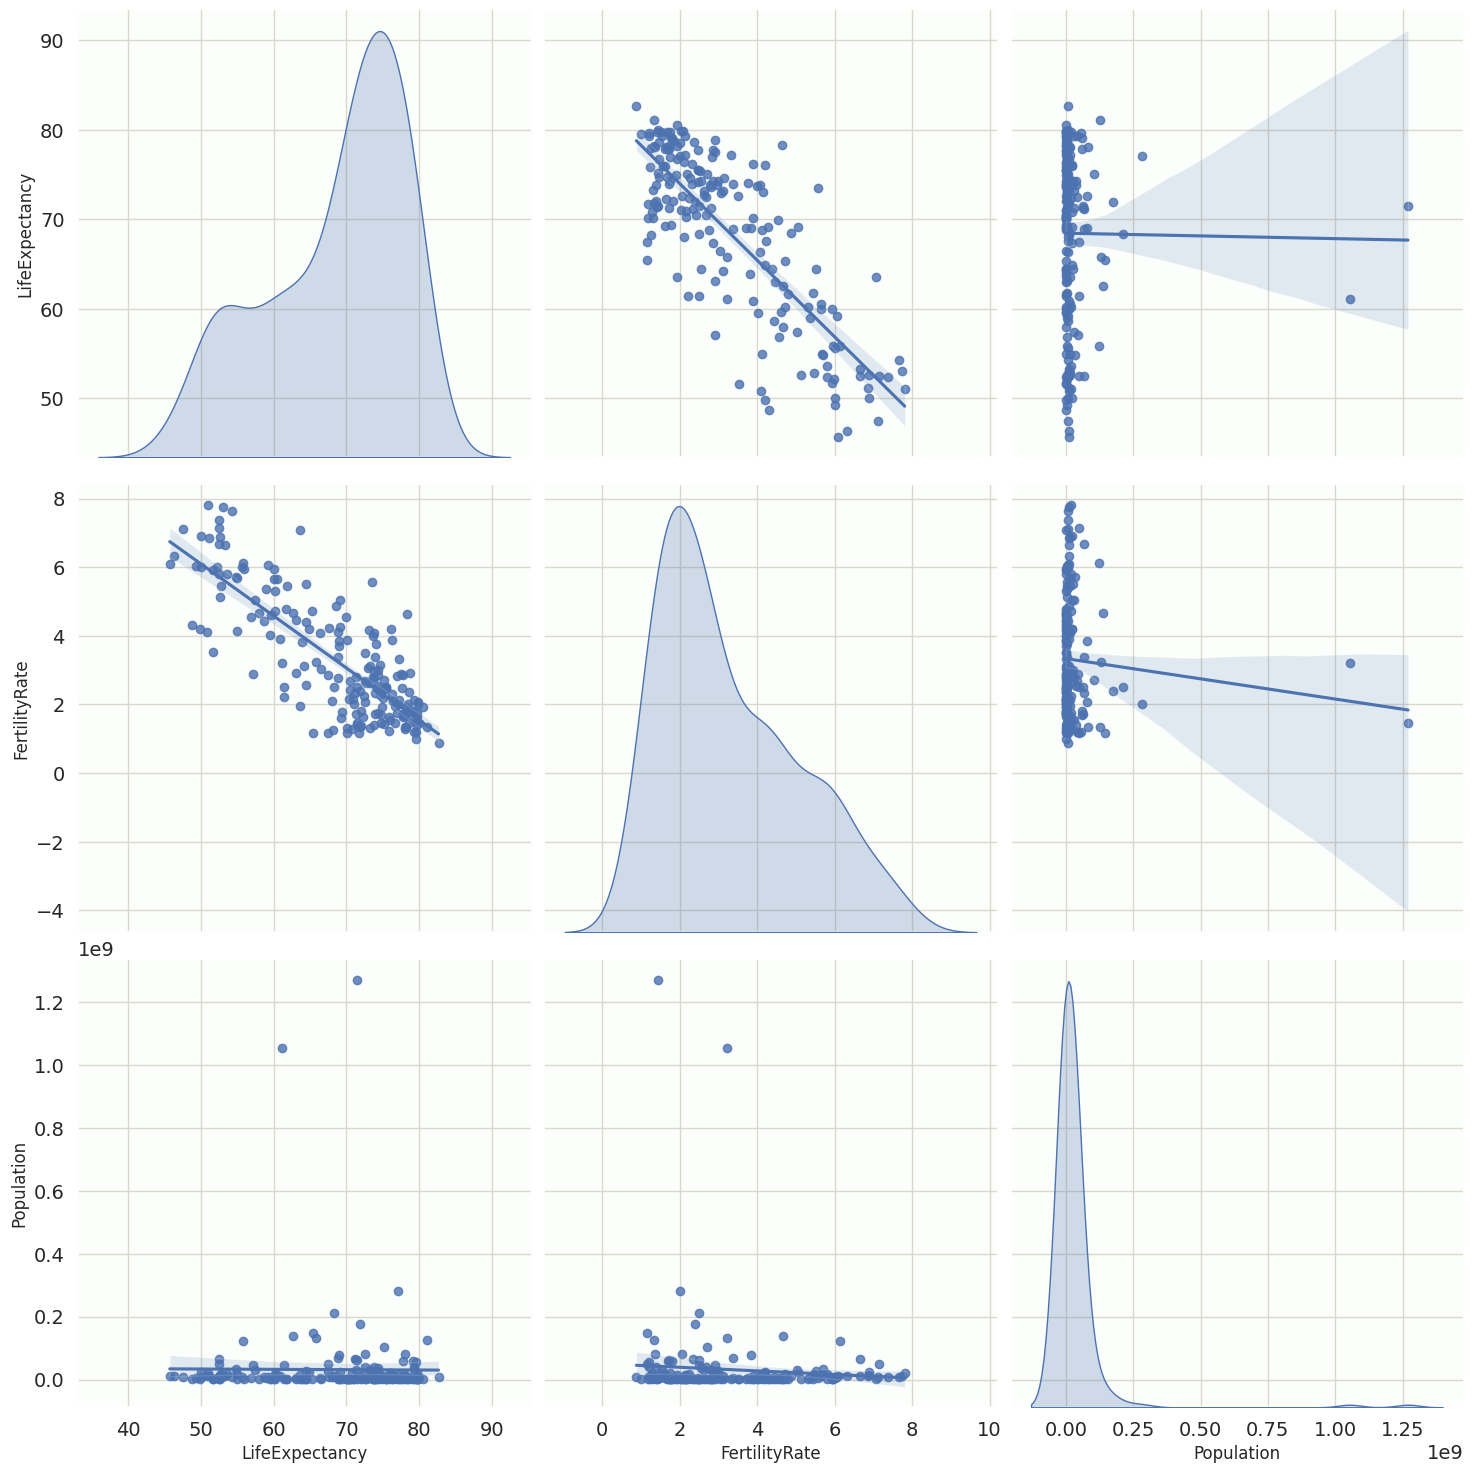

In [17]:
#custom_color = "#606c38"
#custom_palette = sns.color_palette([custom_color]
sns.pairplot(health, height=5, kind='reg', diag_kind='kde') 
             #palette=custom_palette)
plt.show()

Negative relationships are observed.

### Univariated Analysis:
This section contains visualizations regarding the following:
* Population size
* Life Expectancy distribution
* Fertility Rate distribution
* all the above using a world map


In [18]:
max_country = health.loc[health['LifeExpectancy'].idxmax()]['Country']
min_country = health.loc[health['LifeExpectancy'].idxmin()]['Country']
max_life = health['LifeExpectancy'].max()
min_life = health['LifeExpectancy'].min()

print('The highest life expectancy rate is in: ', max_country,'with age: ', max_life)
print('The lowest life expectancy rate is in: ', min_country,'with age: ', min_life)


The highest life expectancy rate is in:  Hong Kong, China with age:  82.663
The lowest life expectancy rate is in:  Zambia with age:  45.7


In [19]:
top10_pop = health.nlargest(10,'Population')
top10_pop

,Country,LifeExpectancy,FertilityRate,Population,Region
35,China,71.5,1.45,1269974572,East Asia & Pacific
78,India,61.1,3.21,1053481072,South Asia
180,United States,77.1,2.01,282895741,America
79,Indonesia,68.3,2.50,211540428,East Asia & Pacific
23,Brazil,71.9,2.40,175786441,America
142,Russia,65.4,1.16,146400951,Europe & Central Asia
130,Pakistan,62.6,4.67,138250487,South Asia
13,Bangladesh,65.8,3.23,131280739,South Asia
86,Japan,81.1,1.34,125714674,East Asia & Pacific
127,Nigeria,55.8,6.13,122876723,Sub-Saharan Africa


Population is expected to have outliers. Let's confirm with a box plot.

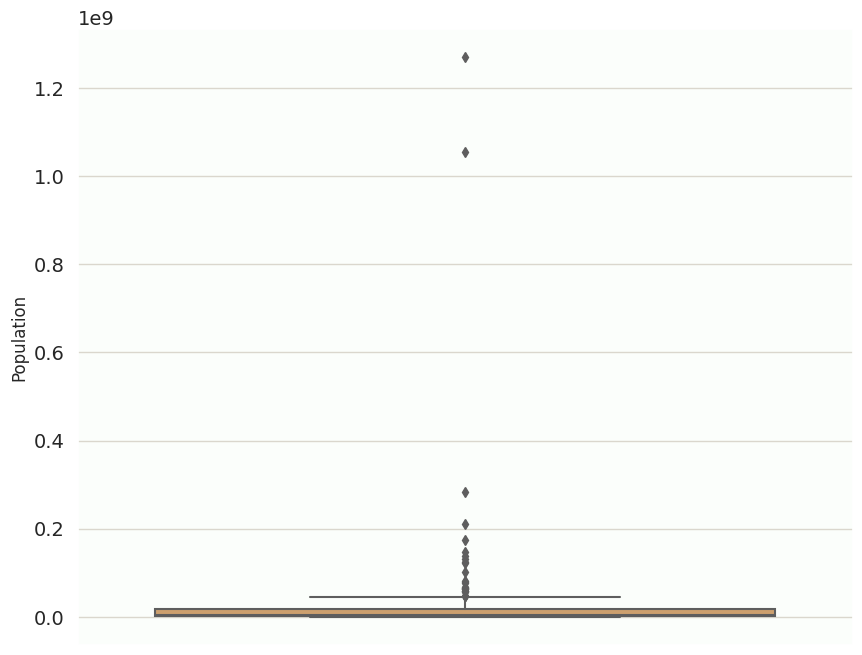

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y=health['Population'], color='#dda15e')
plt.show()

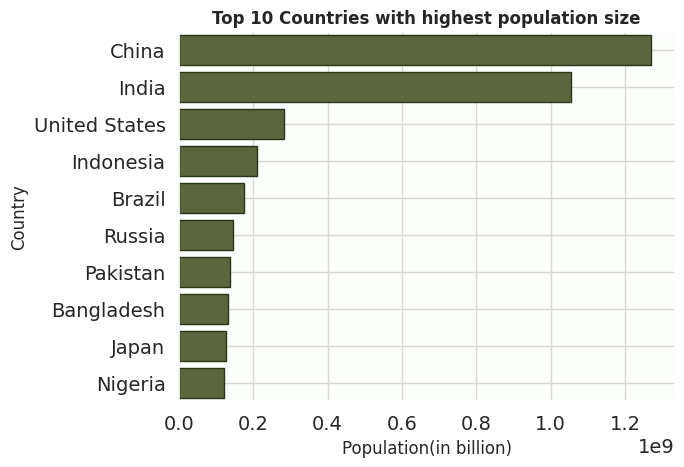

In [21]:
#plot top 10 ten countries with population size
sns.barplot(top10_pop,
            y='Country',
            x='Population',
            color='#606c38', 
            edgecolor='#283618')

plt.xlabel('Population(in billion)')
plt.ylabel('Country')
plt.title('Top 10 Countries with highest population size',
          fontweight='bold', fontsize=12)

plt.grid(True)
plt.show()

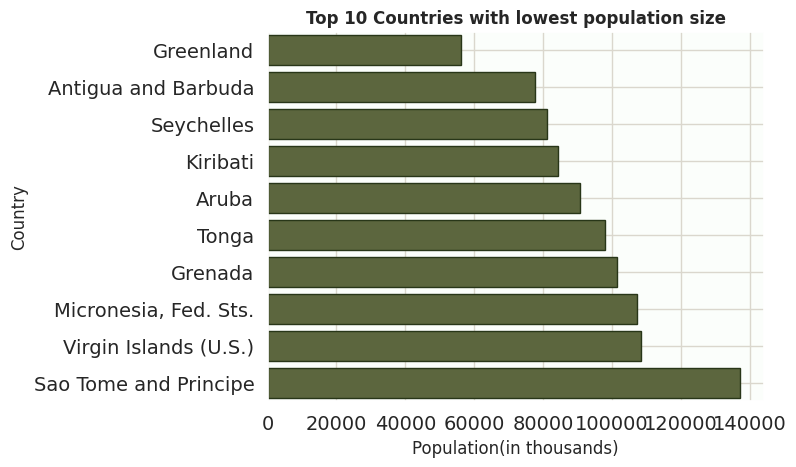

In [22]:
#top 10 countries from the bottom
low10_pop = health.nsmallest(10,'Population')
low10_pop

sns.barplot(low10_pop,
            y='Country',
            x='Population',
            color='#606c38',
            edgecolor='#283618')

plt.xlabel('Population(in thousands)')
plt.ylabel('Country')
plt.title('Top 10 Countries with lowest population size', 
          fontweight='bold', fontsize=12)

plt.grid(True)
plt.show()

> This particular piece of code was taken from:
https://www.kaggle.com/code/georgyzubkov/instagram-influencers-eda-statistical-tests?scriptVersionId=97402561&cellId=35

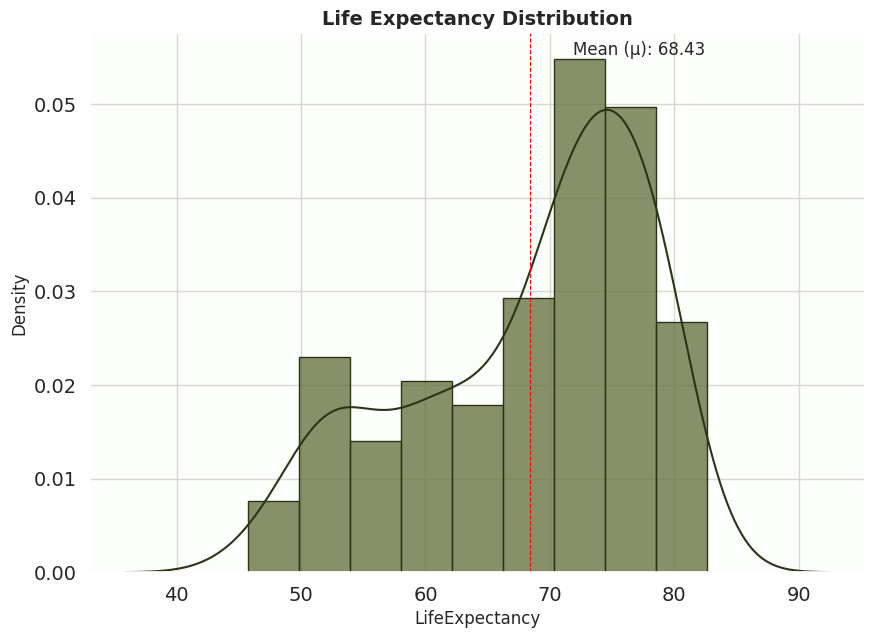

In [23]:
plt.figure(figsize=(10, 7))
sns.histplot(health['LifeExpectancy'], 
             stat='density',
             color='#606c38', 
             edgecolor='#283618')

sns.kdeplot(health['LifeExpectancy'], color='#283618')

plt.axvline(health['LifeExpectancy'].mean(),
            color='red', 
            linestyle='--', 
            linewidth=0.8)

min_ylim, max_ylim = plt.ylim()

plt.text(health['LifeExpectancy'].mean()*1.05, max_ylim*0.96, \
         'Mean (μ): {:.2f}'.format(health['LifeExpectancy'].mean()))

plt.title('Life Expectancy Distribution', fontweight='bold', fontsize=14)


plt.grid(True)
plt.show()

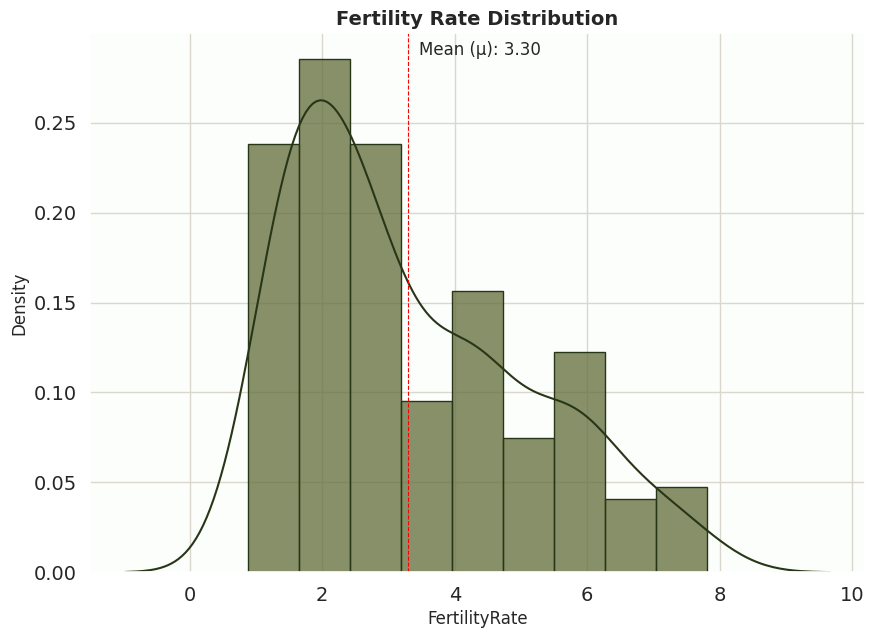

In [24]:
plt.figure(figsize=(10, 7))
sns.histplot(health['FertilityRate'],
             stat='density',
             color='#606c38', 
             edgecolor='#283618')

sns.kdeplot(health['FertilityRate'], color='#283618')

plt.axvline(health['FertilityRate'].mean(),
            color='red', 
            linestyle='--', 
            linewidth=0.8)

min_ylim, max_ylim = plt.ylim()

plt.text(health['FertilityRate'].mean()*1.05, max_ylim*0.96, \
         'Mean (μ): {:.2f}'.format(health['FertilityRate'].mean()))

plt.title('Fertility Rate Distribution', fontweight='bold', fontsize=14)

plt.grid(True)
plt.show()

**Visualization using the World Map** 

In [25]:
fig1 = px.choropleth(health, 
                    locations="Country", 
                    locationmode='country names',
                    color="Population",
                    hover_name="Country",
                    hover_data={"LifeExpectancy": True,
                               "Population": True},
                    title="World Map of Population size",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig1.show()

In [26]:
fig2 = px.choropleth(health, 
                    locations="Country", 
                    locationmode='country names',
                    color="FertilityRate",
                    hover_name="Country",
                    hover_data={"LifeExpectancy": True,
                               "Population": True},
                    title="World Map of Fertility Rate",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig2.show()

In [27]:
fig3 = px.choropleth(health, 
                    locations="Country", 
                    locationmode='country names',
                    color="LifeExpectancy",
                    hover_name="Country",
                    hover_data={"LifeExpectancy": True,
                               "Population": True},
                    title="World Map of Life Expectancy",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig3.show()

### Bivariated Analysis:
This section contains visualizations regarding the following:
* Population and Life Expectancy Rate
* Population and Fertility Rate
* Life Expectancy Rate and Fertility Rate



In [28]:
#define a function for efficiency
def reg_scatterplot(x,y):
    sns.scatterplot(data=health,
                    x=x, 
                    y=y,
                    color='#606c38', 
                    alpha=0.5)
    plt.title('Relationship between {x} and {y} Rate'.format(x=x, y=y), 
              fontweight='bold', fontsize=14)
    sns.regplot(data=health,
                x=x, 
                y=y,
                scatter=False, 
                color='#606c38',  
                line_kws={'linewidth': 2})
    plt.grid(True)
    plt.show()

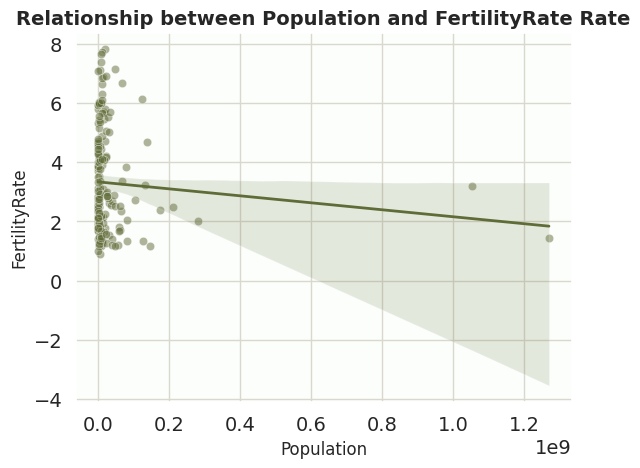

In [29]:
reg_scatterplot('Population','FertilityRate')

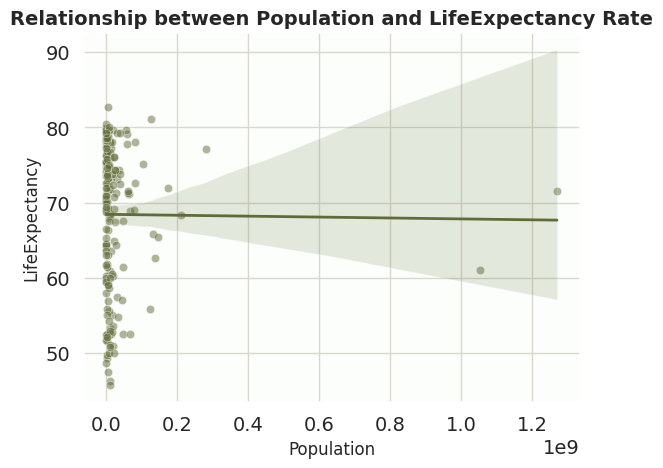

In [30]:
reg_scatterplot('Population', 'LifeExpectancy')

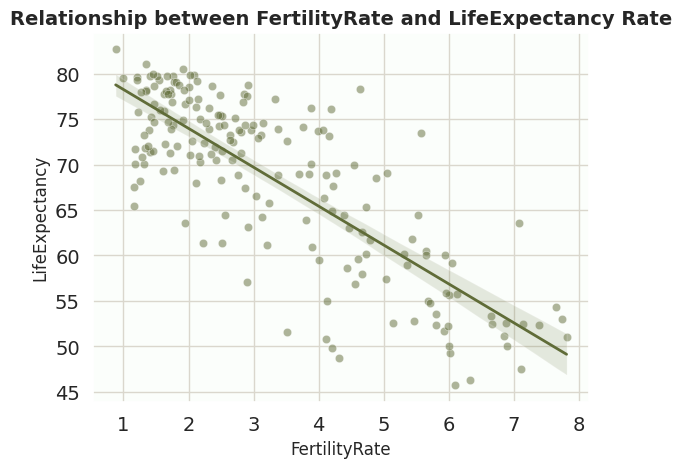

In [31]:
reg_scatterplot('FertilityRate', 'LifeExpectancy')

### Region wise Analysis
This section contains visualizations regarding the following:
* Region and number of countries in it
* Region and average Population by region
* Region and average Life Expectancy Rate
* Region and average Fertility Rate

In [32]:
num_countries = health.groupby('Region')['Country'].nunique().reset_index()
num_countries

,Region,Country
0,America,37
1,East Asia & Pacific,29
2,Europe & Central Asia,49
3,Middle East & North Africa,20
4,South Asia,8
5,Sub-Saharan Africa,48


> This particular piece of code was taken from:
https://www.kaggle.com/code/asgharian/full-tasks-eda-ca-regression?scriptVersionId=171580786&cellId=11

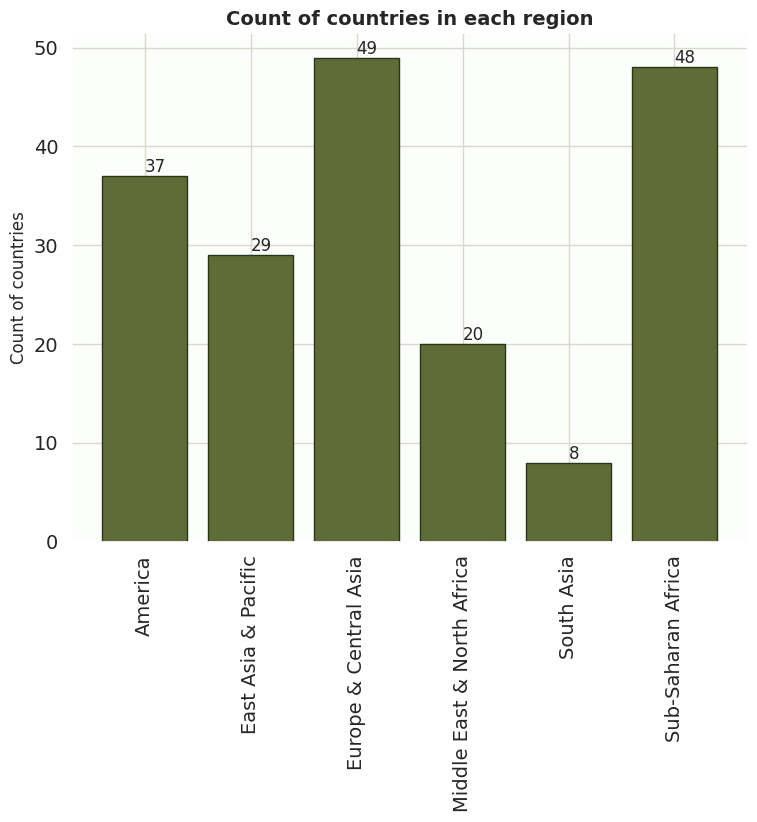

In [33]:
plt.figure(figsize=(8,6))
bars = plt.bar( num_countries['Region'],
               num_countries['Country'],
               color='#606c38',
              edgecolor='#283618')
plt.ylabel('Count of countries')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, 
             round(yval, 1), va='bottom')

plt.title('Count of countries in each region', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [34]:
fig4 = px.sunburst(num_countries, path=['Region'], values='Country')
fig4.show()

In [35]:
#define a function for efficency
def barplot(y):
    plt.figure(figsize=(10,6))
    df = health.groupby('Region')[y].mean().reset_index()
    sns.barplot(data=df,
                    x='Region', 
                    y=y, 
                    color='#606c38', edgecolor='#283618')
    plt.title('Trend of Region and {y} '.format(y=y), 
              fontweight='bold', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

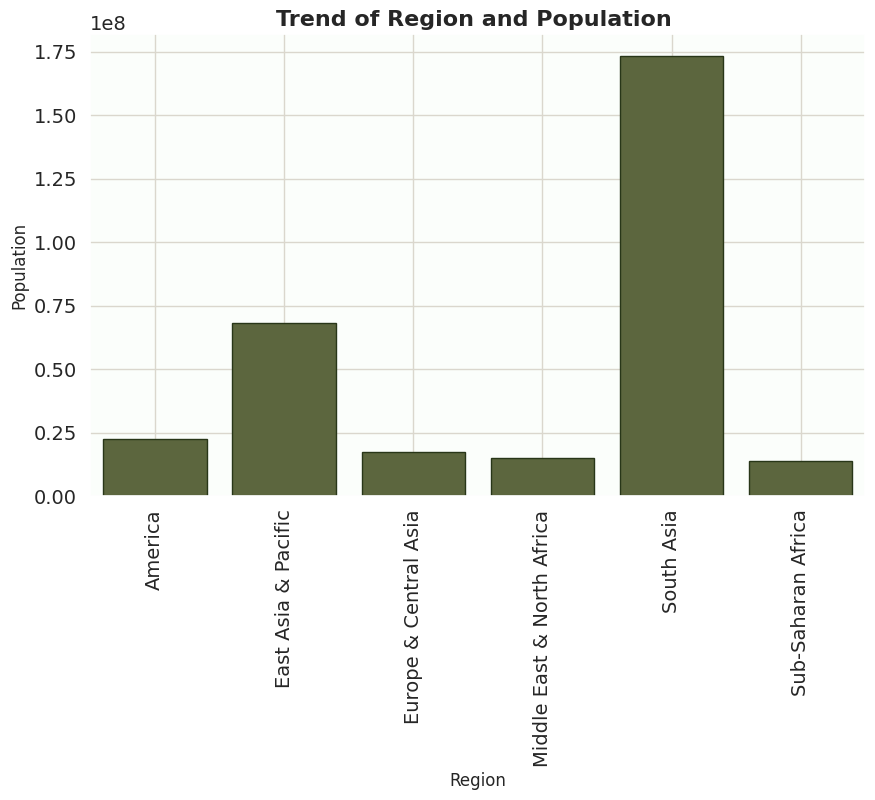

In [36]:
barplot('Population')

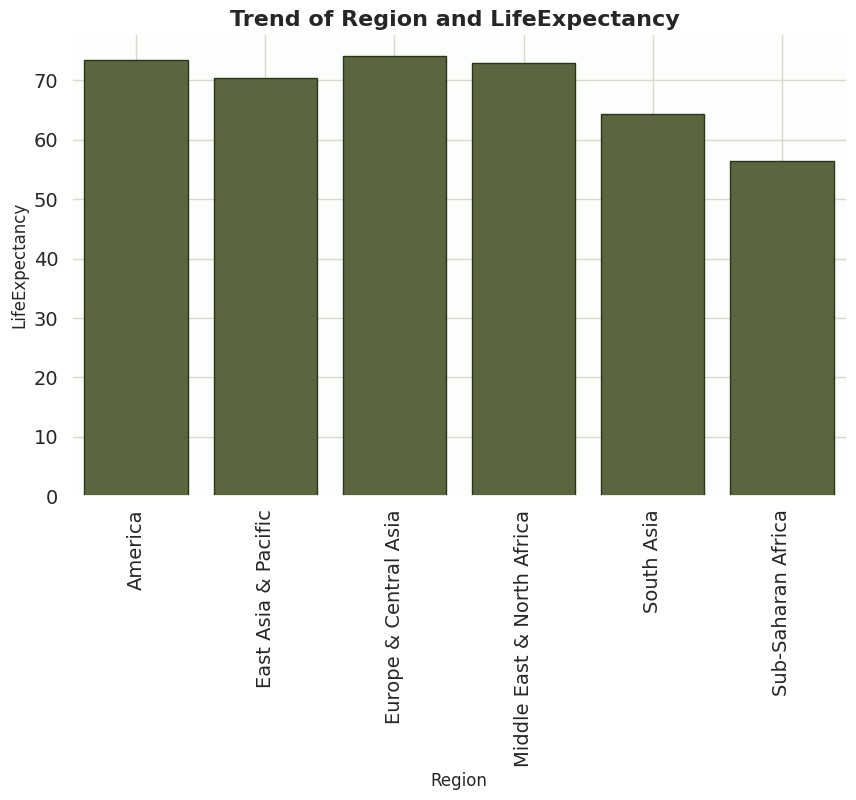

In [37]:
barplot('LifeExpectancy')

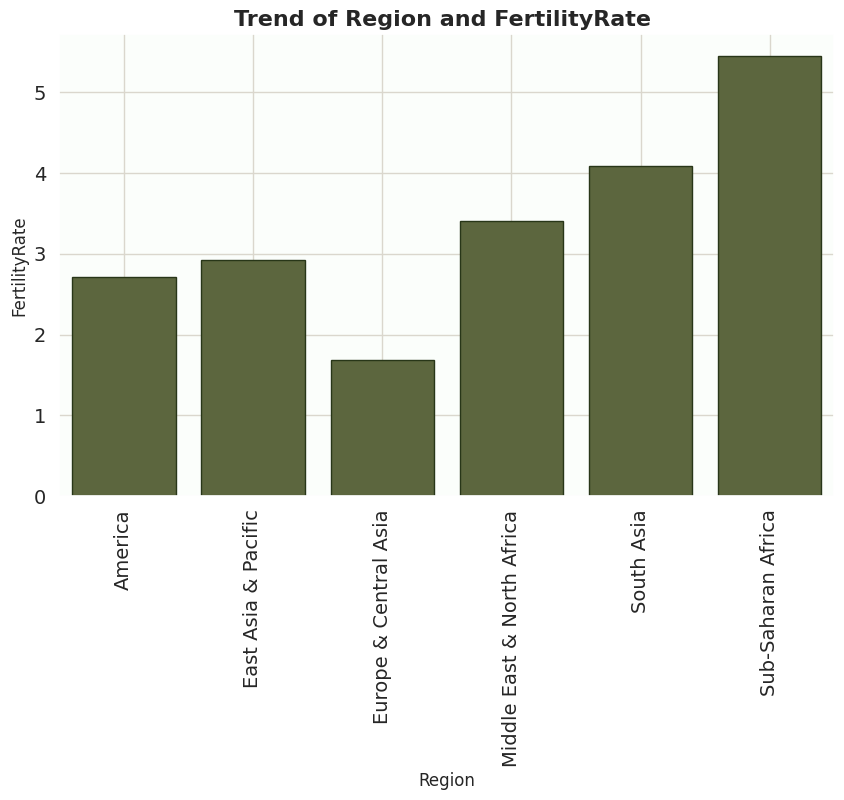

In [38]:
barplot('FertilityRate')

### Correlation:

In [39]:
health.select_dtypes(include=[np.number]).columns

Index(['LifeExpectancy', 'FertilityRate', 'Population'], dtype='object')

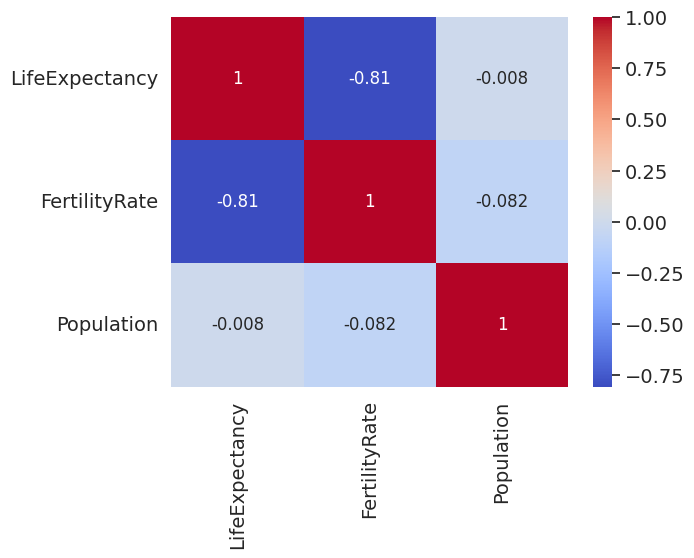

In [40]:
health_num = health[['LifeExpectancy', 'FertilityRate', 'Population']]
health_num.corr()
sns.heatmap(health_num.corr(),annot=True,cmap='coolwarm')
plt.show()

# 3. Conclusion

* China and India have the highest population sizes and are outliers.
* The highest fertility rate is in Afghanistan and Niger(app. 8 children)
* The highest Life expectancy rate is in China, Hong Kong (82 years)
* An average person is expected to live for an average of 68.4 years.
* An average person is expected to have at least 3 children.
* There is no relationship between population, fertility rate and life expectancy 
* There is a strong negative relationship between Fertility rate and Life expectancy— A person with more children is less likely to see themselves in their 80s. 
* A person from the Sub-Sahara African Region is likely to have more children than anywhere else.
* A person from Europe and Central Asia is more likely to live longer.
